## Kicking Horses
$$\text{ Work in progress, going to update soon }$$

A famous early application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by Bortkiewicz in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| #Deaths | 0 | 1 | 2 | 3 | 4 |
| :-: | :-: | :-: | :-: | :-: | :-: |
| #Groups | 109 | 65 | 22 | 3 | 1 |

> Plot the resulting probability distribution. Careful with the normalization

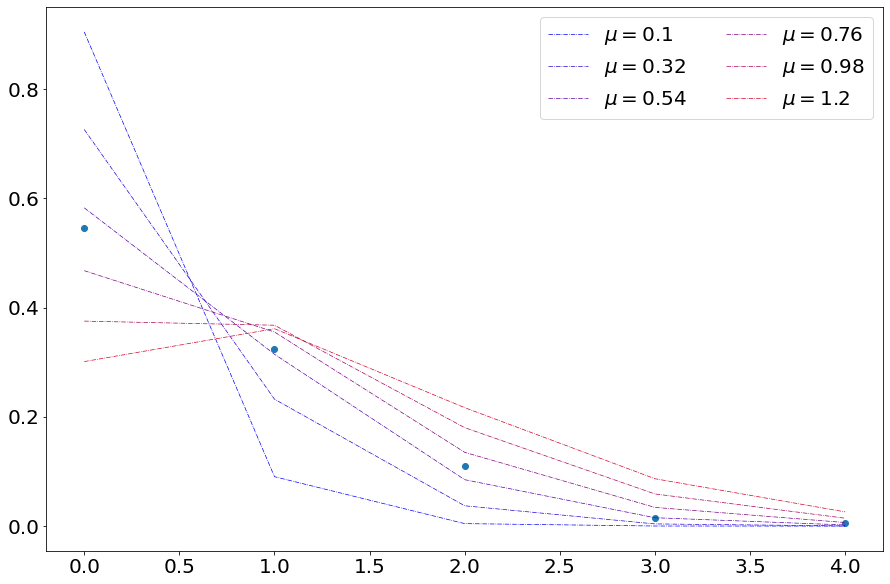

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 20

from scipy import stats

groups = np.array([109,65,22,3,1])
deaths = np.arange(0,5)

# Recycling my Color Palette from AstroLab :^)

def Redshift_Colors( L ):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcol
    import matplotlib.cm as cm

    # Make a user-defined colormap.
    cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])

    # Make a normalizer that will map the values from
    # [0,L] -> [0,1].
    cnorm = mcol.Normalize(vmin=0,vmax=L)

    # Turn these into an object that can be used to map values to colors and
    # can be passed to plt.colorbar().
    cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
    cpick.set_array([])

    colors = []
    for c in range(L):
        colors.append(cpick.to_rgba(c))
    return colors

tot = np.sum(groups)
freq = groups/tot

plt.scatter(deaths,freq)

L = 6
mu_s = np.linspace(0.1,1.2,L)
colors = Redshift_Colors(L)
for mu, col in zip(mu_s,colors):
    p = stats.poisson(mu).pmf(deaths)
    tag = '$\mu = $'+ str(np.round(mu,2))
    plt.plot(deaths, p, label=tag, lw=0.7, ls='-.', color=col)

plt.legend(ncol=2)

How does it look like? Try to fit it by hand.

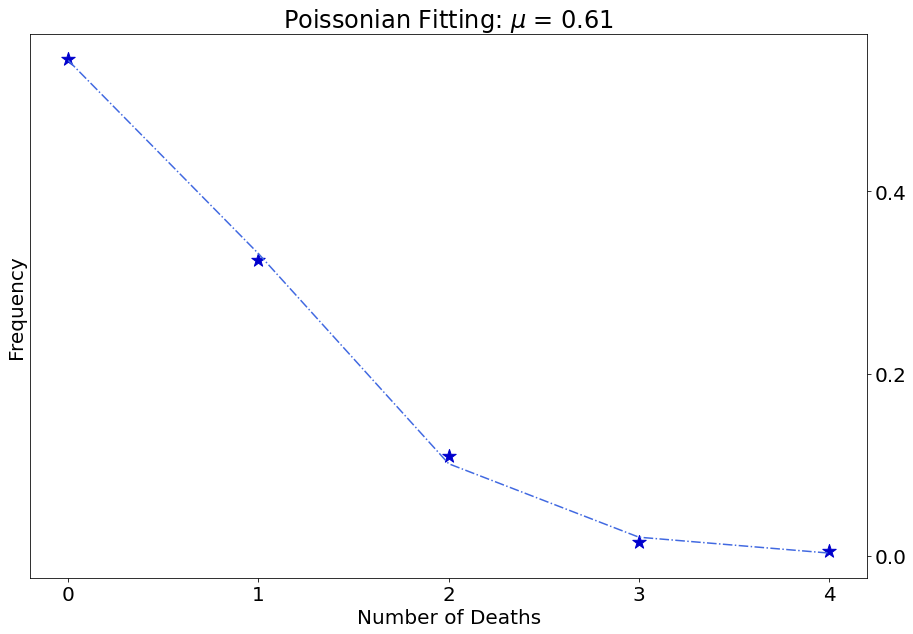

In [91]:
best_mu = np.average(deaths,weights=freq)
p = stats.poisson(best_mu).pmf(deaths)
plt.plot(deaths,p,c='royalblue', ls='-.')
plt.scatter(deaths,freq, s=200, marker='*',c='mediumblue')
ax = plt.gca()
ax.yaxis.tick_right()
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Deaths')
ax.set_title('Poissonian Fitting: $\mu$ = ' + str(np.around(best_mu,2)))
plt.locator_params(nbins=5)